In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/home/umairshah/python_folder/AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format = True)

In [6]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
indexedDf = df.set_index('Month')

In [8]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
from datetime import datetime
indexedDf.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


/home/umairshah/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


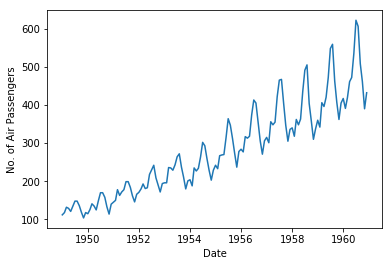

In [10]:
plt.xlabel('Date')
plt.ylabel('No. of Air Passengers')
plt.plot(indexedDf)

In [11]:
indexedDf.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
# determining rolling statistics

rolmean = indexedDf.rolling(window = 12).mean()

In [13]:
rolmean.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [14]:
# rollin standard deviation

rolstd = indexedDf.rolling(window = 12).std()

In [15]:
rolstd.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


/home/umairshah/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "Best". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


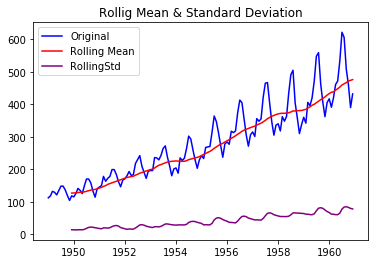

In [16]:
orig = plt.plot(indexedDf, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'purple', label = 'RollingStd')
plt.legend(loc = 'Best')
plt.title('Rollig Mean & Standard Deviation')
plt.show(block = False)

In [17]:
# stationary or unit-root test
# dickey-fuller test
# process is said to be stationary if it's mean and variacne are constant over time

from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-fuller Test: ')
df_test = adfuller(indexedDf['#Passengers'], autolag = 'AIC')

df_output = pd.Series(df_test[0:4], index = ['Test_Statistic', 'P vlaue', '#lags used', 'No. of Observations Used' ])

for key,value in df_test[4].items():
    df_output['Critical Value (%s)' %key] = value
    
print(df_output)

Results of Dickey-fuller Test: 
Test_Statistic                0.815369
P vlaue                       0.991880
#lags used                   13.000000
No. of Observations Used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


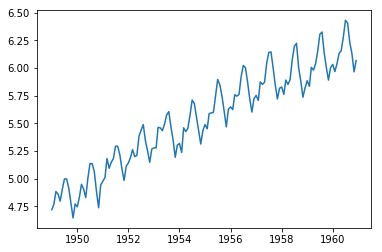

In [18]:
indexedDf_log = np.log(indexedDf)
plt.plot(indexedDf_log)

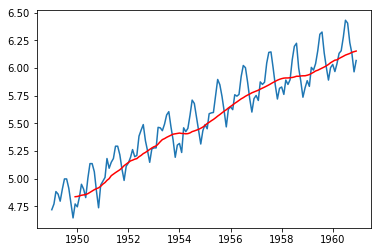

In [19]:
moving_average = indexedDf_log.rolling(window = 12).mean()
moving_std = indexedDf_log.rolling(window = 12).std()
plt.plot(indexedDf_log)
plt.plot(moving_average, color = 'red')

In [20]:
difference = indexedDf_log - moving_average
difference.head(12)

difference.dropna(inplace = True)
difference.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [27]:
def test_stationary(timeSeries):
    movingAverage = timeSeries.rolling(window = 12).mean()
    
    movingStd = timeSeries.rolling(window = 12).std()
    
    orig = plt.plot(timeSeries, color = 'blue', label = 'original')
    mean = plt.plot(movingAverage, color = 'red', label = 'rolling mean')
    std = plt.plot(movingStd, color = 'black', label = 'rolling deviation')
    plt.legend(loc = 'best')
    plt.title("Rolling Mean & Standard deviation")
    plt.show(block = False)
    
    
    # now lets perform Dickey-fuller test
    
    print('Results of Dickey-Fuller test: ')
    dftest = adfuller(timeSeries['#Passengers'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','P value', '#lags used', 'No. of Observations used'])
    
    for key, value in dftest[0:4].items():
        dfoutput['Critical value (%s)' %key] = value
        
    print(dfoutput)

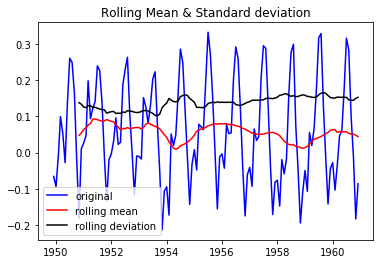

Results of Dickey-Fuller test: 


AttributeError: 'tuple' object has no attribute 'items'

In [28]:
test_stationary(difference)